#**ThinkDSP labs**
---
Непомнящий Матвей - группа 3530901/10101
---

# **lab 1 - Сигналы и звуки**
---

In [ ]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [ ]:
# imports

import matplotlib.pyplot as plt

from thinkdsp import decorate, read_wave

In [ ]:
# Get .wav file

if not os.path.exists('170255__dublie__trumpet.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/170255__dublie__trumpet.wav

--2024-02-09 15:03:10--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/170255__dublie__trumpet.wav
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/170255__dublie__trumpet.wav [following]
--2024-02-09 15:03:10--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/170255__dublie__trumpet.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1540668 (1.5M) [audio/wav]
Saving to: ‘170255__dublie__trumpet.wav’

170255__dublie__tru 100%[===================>]   1.47M  --.-KB/s    in 0.07s   

2024-02-09 15:03:11 (20.8 MB/s) - ‘170255__dublie__tru

## lab 1.2
---

Скачаем с [сайта](https://freesound.org/) образец звука и различными способами исследуем его.
Для удобной работы с сигналами здесь, и в дальнейших работах будем использовать
библиотеку thinkdsp.


Откроем [скаченный файл](https://freesound.org/people/violinsimma/sounds/429671/), нормализуем и выведем его на экран. Код, выполняющий эти действия представлен ниже (при его запуске будет выведена спектрограмма загруженного звукового файла):

In [ ]:
wave = read_wave('170255__dublie__trumpet.wav')
wave.make_audio()

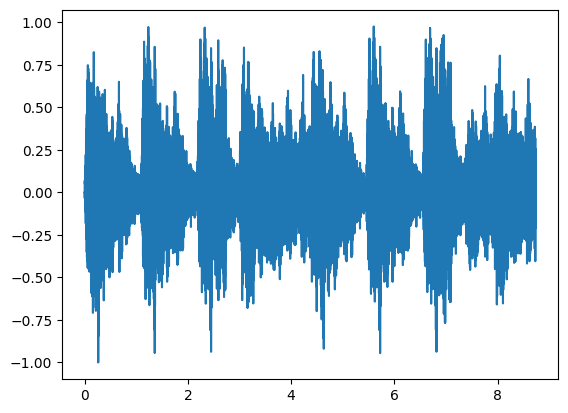

In [ ]:
wave.plot()

Данный файл слишком большой, поэтому выделим из него отрезок длинной в пол секунды так, чтобы высота была примерно одинаковой на всём этом промежутке. Таким образом, рассмотрим сегмент от 40 до 40.5 секунд и распечатаем его спектрограмму с помощью кода ниже:

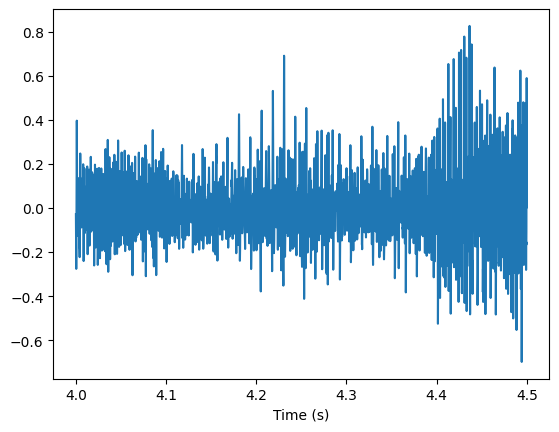

In [ ]:
segment = wave.segment(start=4.0, duration=0.5)
segment.plot()
plt.xlabel('Time (s)');

Разлоожим полученный сегмент в спектр и выведем на экран:

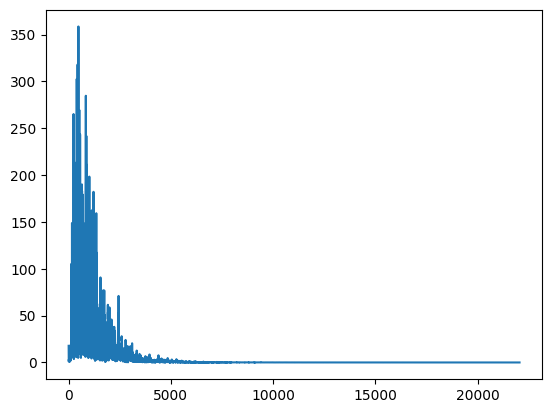

In [ ]:
spectrum = segment.make_spectrum()
spectrum.plot()

Заметим, что видимые изменения в спектрограмме можно наблюдать примерно до 10 кГц. После этого никаких скачков не возникает. Разложим сегмент в спектр повторно, ограничив частоту до 10 кГц

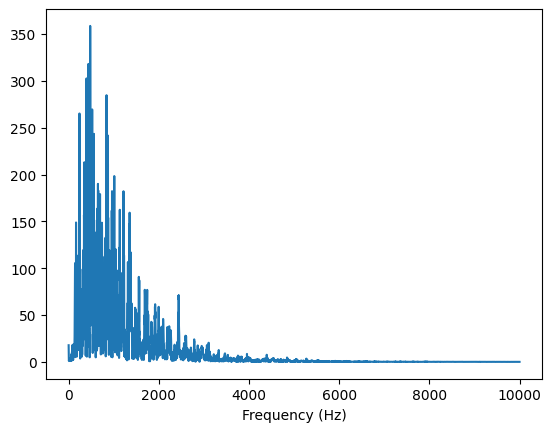

In [ ]:
spectrum.plot(high=10000)
plt.xlabel('Frequency (Hz)');
spectrum.make_wave().make_audio()

Чтобы найти частоту, встречающуюся на протяжении всего файла чаще всего, воспользуемся функцией peaks(), позволяющей вывести отсортированный список пиков частот. Таким образом, наиболее часто встречающейся частотой окажется та, которая будет находиться в вершине списка, т.е. 662.0 Гц

In [ ]:
spectrum.peaks()

[(358.6638802469622, 478.0),
 (318.0895243302988, 438.0),
 (302.6251238126289, 396.0),
 (284.708561936527, 840.0),
 (269.50249603518125, 522.0),
 (265.19165466438164, 240.0),
 (256.7396390867947, 398.0),
 (245.46411392923213, 842.0),
 (243.46371963608115, 560.0),
 (242.905203936116, 476.0),
 (241.80254783288493, 866.0),
 (236.64204602158708, 506.0),
 (226.3249249265425, 480.0),
 (218.39275427562598, 482.0),
 (213.67664653323448, 400.0),
 (213.13716206527332, 348.0),
 (212.09826434812513, 354.0),
 (211.2659144408362, 872.0),
 (208.52770453201785, 350.0),
 (205.17498198876916, 356.0),
 (205.06876863076712, 490.0),
 (201.3091245556651, 484.0),
 (200.01622376174353, 838.0),
 (198.48777902490127, 346.0),
 (198.39979315824337, 1012.0),
 (194.19291343136007, 436.0),
 (192.6882482570886, 850.0),
 (191.98367374388658, 868.0),
 (191.1163182826737, 492.0),
 (190.0515000288296, 650.0),
 (188.31535974004652, 488.0),
 (187.40757921797427, 394.0),
 (183.49317063026967, 648.0),
 (183.20524431732397, 4

Воспользуемся функциями ***low_pass***, ***high_pass*** и ***band_stop***, чтобы отфильтровать гармоники:
* low_pass - убрать частоты ***выше*** границы среза (задаётся в Гц);
* high_pass - убрать частоты ***ниже*** границы среза (задаётся в Гц);
* band_stop - убрать частоты ***между*** срезами

1) Воспользуемся функцией low_pass (фильтр низких частот), чтобы убрать частоты выше 2 кГц:

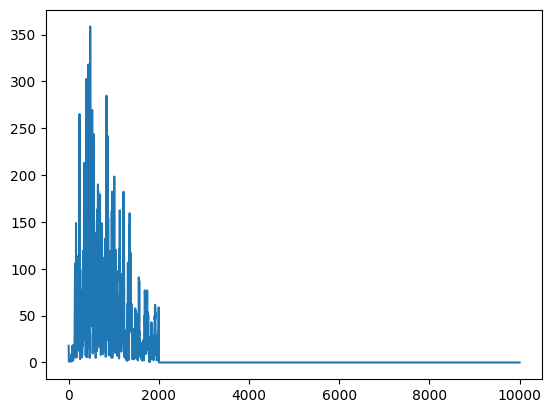

In [ ]:
spectrum = segment.make_spectrum()
spectrum.low_pass(2000)
spectrum.plot(high=10000)
spectrum.make_wave().make_audio()

Заметим, что при удалении высоких частот звук стал более "глубоким" и "приглушённым"

2) Воспользуемся функцией high_pass (фильтр высоких частот), чтобы убрать частоты ниже 1 кГц:

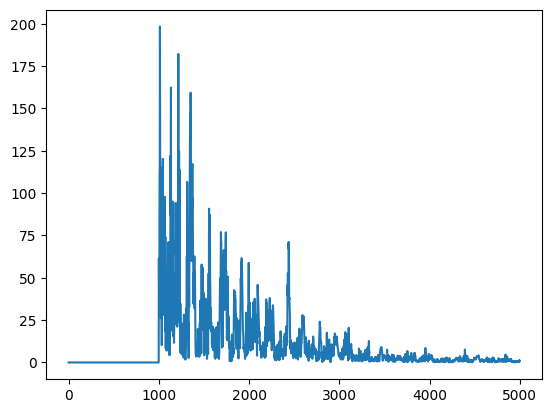

In [ ]:
spectrum = segment.make_spectrum()
spectrum.high_pass(1000)
spectrum.plot(high=5000)
spectrum.make_wave().make_audio()

Заметим, что звук стал "звенящим"


3) Воспользуемся функцией band_stop, чтобы убрать частоты в промежутке от 1 кГц до 2.1 кГц:

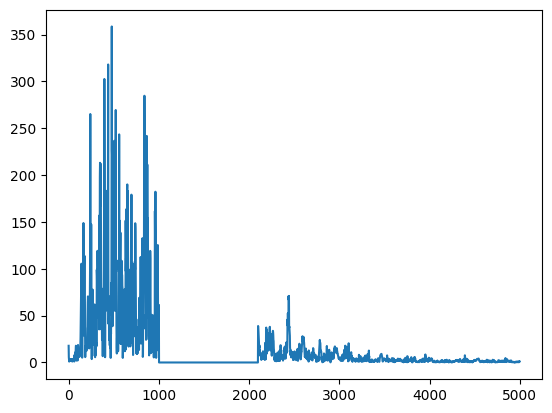

In [ ]:
spectrum = segment.make_spectrum()
spectrum.band_stop(low_cutoff=1000, high_cutoff=2100)
spectrum.plot(high=5000)
spectrum.make_wave().make_audio()

Эта функция позволяет отфильтровать те частототы, которые находятся в некотором промежутке, при ээтом и высокие, и низкие частоты не пострадают. Например, имея запись того, как играет некоторая музыкальная группа, можно выделить частоты соответствующие ударным или струнным инструментам, а остальные удалить.

4) Совместим все три функции описанные выше:

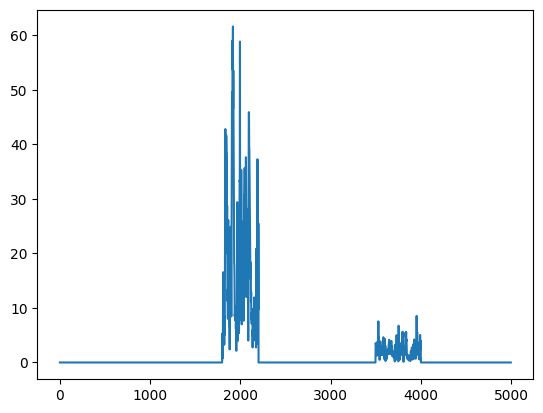

In [ ]:
spectrum = segment.make_spectrum()

# Удалим частоты ниже 1800 Гц
spectrum.high_pass(1800)
# Удалим частоты выше 4000 Гц
spectrum.low_pass(4000)
# Удалим частоты с 2200 по 3500 Гц
spectrum.band_stop(low_cutoff=2200, high_cutoff=3500)

spectrum.plot(high=5000)
spectrum.make_wave().make_audio()

## lab 1.3
---

**Задание**: Создать сложный сигнал из объектов *SinSignal* и *CosSignal*, сумируя их. Обработать сигнал для получения wave и послушать его. Вычислить *Spectrum* и распечатать.

In [ ]:
from thinkdsp import SinSignal, CosSignal

Создадим сложный сигнал, состоящий из синусоидальных и косинусоидальных компонент (будем указывать значения, кратные одному и тому же числу, например, 200). Эти компоненты складываются и интерфирируют между собой, усиливая или уменьшая сигнал:

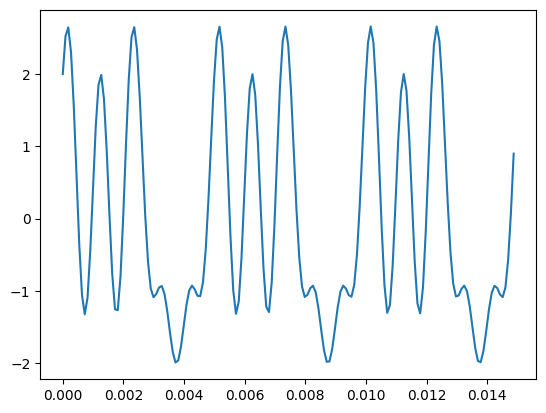

In [ ]:
signal = (SinSignal(freq=200) +
          SinSignal(freq=1000) +
          CosSignal(freq=400) +
          CosSignal(freq=800))
signal.plot()

Чтобы иметь практическое представление о полученном сигнале, воспользуемся функцией make_audio для создания звукового файла. В качестве длины звуковой дорожки укажем значение, равное 2 секукндам.

In [ ]:
wave = signal.make_wave(duration=2)
wave.apodize()
wave.make_audio()

Составим спектрограмму аналогично тому, как делали это в предыдущем пункте:

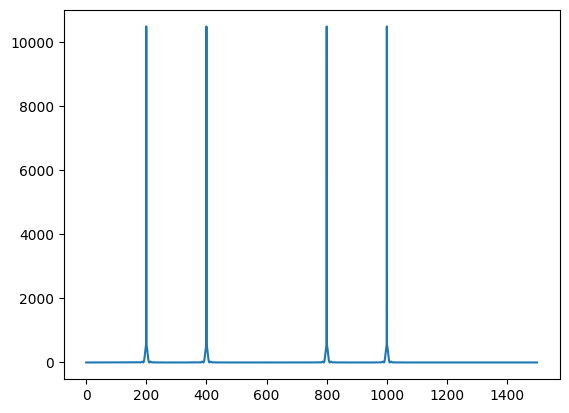

In [ ]:
spectrum = wave.make_spectrum()
spectrum.plot(high=1500)

Как видно из получившейся спектрограммы, пики находятся на тех же частотах, что и значения, указанные при создании сигнала.

* Для проверки того как будет вести себя звуковой сигнал, добавим ещё одну частоту, кратную 200. В данном случае в качестве такой было взято 600 Гц. Заметим, что при этом гармоника звука не сильно нарушается, т.к. все частоты кратны одному и тому же значению (200)

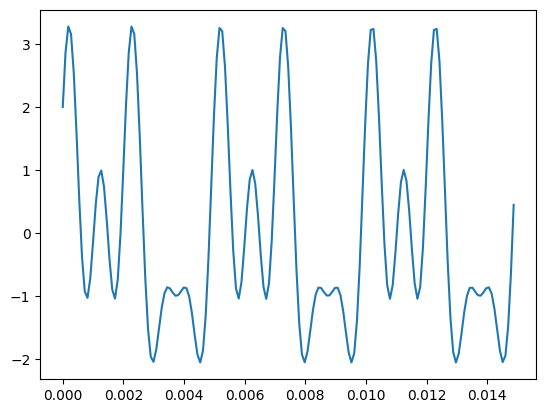

In [ ]:
signal += SinSignal(freq=600)
signal.plot()
signal.make_wave(duration=2).make_audio()

* Теперь добавим ещё одну частоту в исходный сигнал, которая не будет кратна 200 (например, 555 Гц). Заметим, что звук изменился - тональность осталась примерно та же, однако, на фоне слышен посторонний звук, связанный с добавлением новой частоты, не кратной 200.

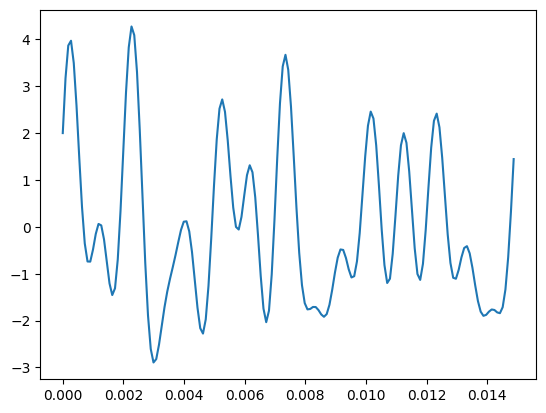

In [ ]:
signal += SinSignal(freq=555)
signal.plot()
signal.make_wave(duration=2).make_audio()

После добавления частот, равных 600 и 555 Гц спектр сигнала будет выглядеть следующим образом:

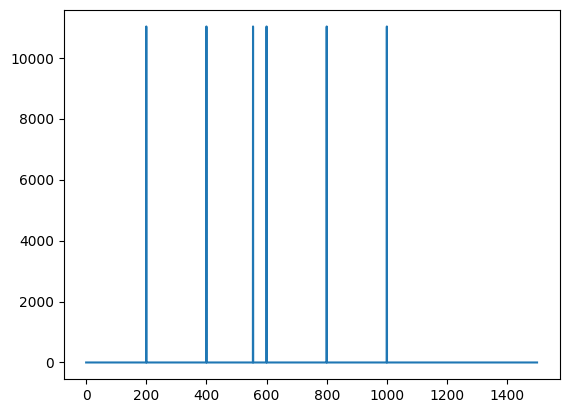

In [ ]:
wave = signal.make_wave(duration=2)
spectrum = wave.make_spectrum()
spectrum.plot(high=1500)

Таким образом, можно сделать вывод о том, что происходит при добавлении частотных компонент, не кратных основным:

1. Появление новых частотных составляющих:

 В спектре сигнала появятся новые частоты, которые не являются кратными основным частотам.

2. Изменение формы сигнала:

 Форма сигнала станет более сложной и нерегулярной. Появятся новые пики и минимумы, обусловленные интерференцией между новыми и основными частотными компонентами.

3. Появление биений:

 Если добавленная частота близка к одной из основных частот, то в сигнале могут появиться биения (периодические изменения амплитуды сигнала, вызванные интерференцией двух близких по частоте колебаний).

4. Расширение спектра сигнала:

 Спектр сигнала (распределение частотных компонент) станет шире.
 Это означает, что сигнал будет занимать более широкий диапазон частот.

5. Влияние на восприятие:

 Например, звук с добавленными некратными частотами может казаться более резким или диссонансным.

## lab 1.4
---

**Задание**: Написать функцию ***stretch***, берущую ***wave*** и коэффициент изменения. Она должна ускорять или замедлять сигнал изменением ***ts*** и ***framerate***.

Откроем [скаченный файл](https://freesound.org/people/FullMetalJedi/sounds/388954/), нормализуем и выведем его на экран. Код, выполняющий эти действия представлен ниже (при его запуске будет выведена спектрограмма загруженного звукового файла):

In [ ]:
wave = read_wave('acousticRiff.wav')
wave.make_audio()

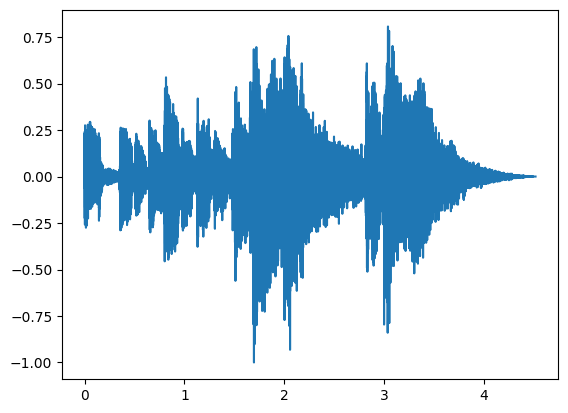

In [ ]:
wave.plot()

Ускорим рассматриваемый файл, воспользовавшись функцией ***stretch***:

In [ ]:
def stretch(wave, factor):
    """Speeding up and slowing down a signal

    wave: Wave
    factor: numerical value of the multiplier
    """
    wave.framerate /= factor
    wave.ts *= factor

* Замедлим рассматриваемый файл в 2 раза. Для этого в функции ***stretch*** укажем значение аргумента ***factor = 2***:

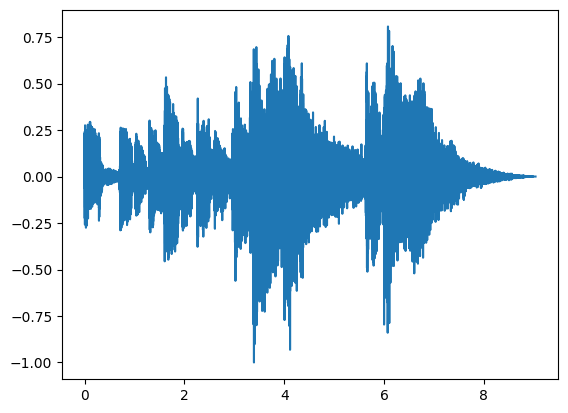

In [ ]:
stretch(wave, 2)
wave.plot()
wave.make_audio()

* Ускорим рассматриваемый файл в 2 раза. Для этого в функции ***stretch*** укажем значение аргумента ***factor = 0.5***:

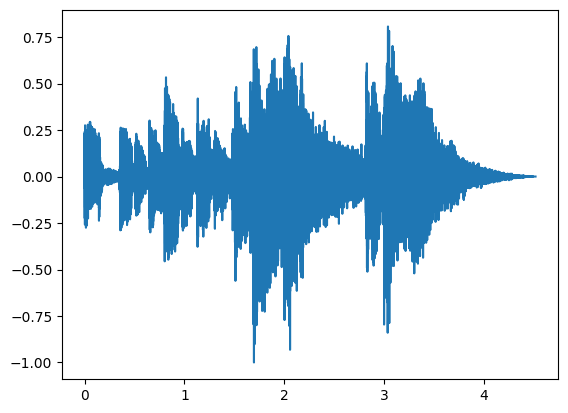

In [ ]:
stretch(wave, 0.5)
wave.plot()
wave.make_audio()

Файл был замедлен в 2 раза, а затем ускорен в 2 раза. Как и ожидалось в первый раз скорость воспроизведения увеличилась, а при последующем ускорении был вновь получен исходный файл. При этом изменялась только длительность аудиофайла (спектрограмма оставалась такой же, какой и была изначально).

# **lab 2 - Гармоники**
---

In [ ]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [ ]:
from thinkdsp import Sinusoid, decorate, unbias, normalize
from thinkdsp import SquareSignal, TriangleSignal
import numpy as np

* ***unbias*** - смещает сигнал так, что он центрируется по 0
* ***normalize*** - масштабирует сигнал до заданной амплитуды amp

## lab 2.2
---

**Задание**: Написать класс, называемый **SawtoothSignal**, расширяющий **signal** и предоставляющий **evaluate** для оценки пилообразного сигнала.

### Пилобразный сигнал

In [ ]:
class SawtoothSignal(Sinusoid):

    def evaluate(self, ts):
        """Оценивает сигнал в заданное время

        ts: последовательность моментов времени, в которые оценивается сигнал
        """
        # freq - частота, ts - временная последовательность, offset - добавочное смещение
        # (freq * ts) - кол-во циклов от начала
        # offset / (2 * pi) - число полных циклов
        # cycles - кол-во циклов
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

* ***freq*** - частота
* ***ts*** - временная последовательность
* ***offset*** - добавочное смещение
* ***(freq * ts)*** - кол-во циклов от начала
* ***offset / (2 * pi)*** - число полных циклов
* ***cycles*** - кол-во циклов

Воспользовавшись написанным выше классом, создадим фрагмент аудиофайла длиной в 1 секунду с частотой 20 кГц. Также, распечатаем спектр сегмента длиной в 0.05 секунды, чтобы удостовериться в правильности формы сигнала

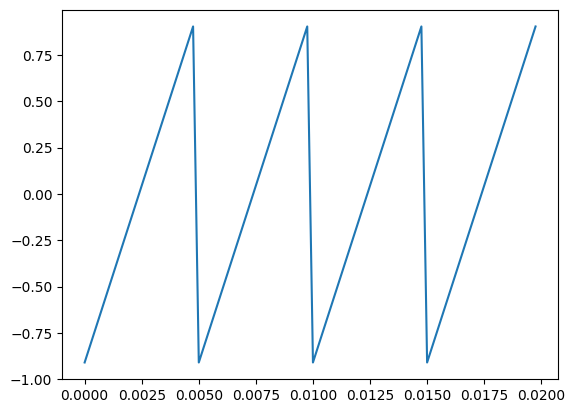

In [ ]:
sawtooth = SawtoothSignal(200).make_wave(duration=0.5, framerate=4000)
sawtooth.segment(duration=0.02).plot()
sawtooth.make_audio()

Составим спектрограмму данного аудиофайла, чтобы увидеть то, как располагаются частоты внутри звукового файла. Можно увидеть, что они уменьшаются пропорционально $1/f$


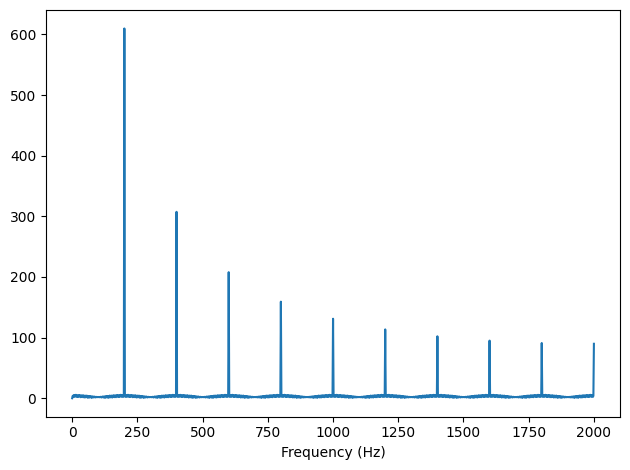

In [ ]:
spectrum = sawtooth.make_spectrum()
spectrum.plot(10000)
decorate(xlabel='Frequency (Hz)')

Рассмотрим 5 пиков спектра, можно заметить, что тут содержутся как чётные, так и нечётные гармоники

In [ ]:
sawtooth.make_spectrum().peaks()[:5]

[(609.6792973091863, 200.0),
 (307.3574911703562, 400.0),
 (207.84208349469822, 600.0),
 (159.19211928880733, 800.0),
 (131.08338845690827, 1000.0)]

Добавим к предыдущей спектрограмме новую, которая будет соответствовать прямоугольному сигналу (на диаграмме ниже выделена красным цветом). Для того, чтобы можно было сравнить и наглядно увидеть разницу между дввумя этими сигналами, при создании прямоугольного сигнала укажем значение $amp=0.5$

### Прямоугольный сигнал

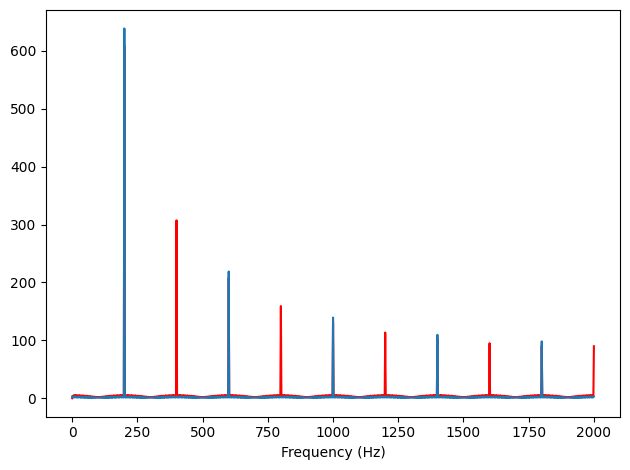

In [ ]:
sawtooth.make_spectrum().plot(color='red')
square = SquareSignal(freq=200, amp=0.5).make_wave(duration=0.5, framerate=4000)
square.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

Сравним 5 пиков прямоугольного сигнала и сравним значения с полученными ранее для пилообразного сигнала

In [ ]:
square.make_spectrum().peaks()[:5]

[(638.7828910440652, 200.0),
 (218.9232741468842, 600.0),
 (139.31618714277246, 1000.0),
 (109.56806942182106, 1400.0),
 (98.28456801232416, 1800.0)]

Можно сделать вывод о том, что прямоугольный сигнал, как и пилообразный, уменьшается пропорционально $1/f$. Однако, прямоугольный сигнал имеет только нечётные гармоники, в отличие от пилообразного.

### Треугольный сигнал

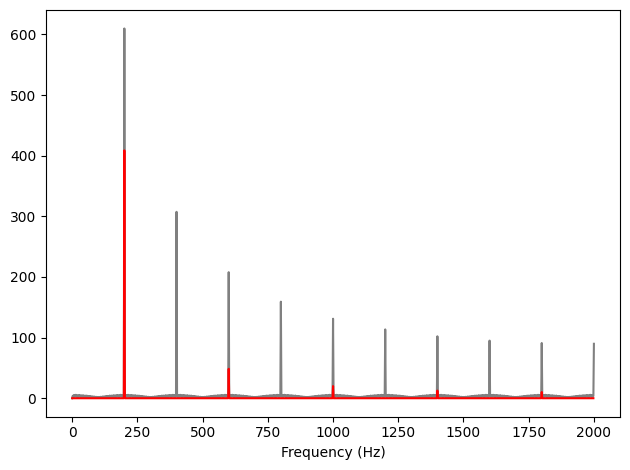

In [ ]:
sawtooth.make_spectrum().plot(high=10000, color='grey')
triangle = TriangleSignal(freq=200, amp=0.5).make_wave(duration=0.5, framerate=4000)
triangle_spectrum = triangle.make_spectrum()
triangle_spectrum.plot(high=2000, color='red')
decorate(xlabel='Frequency (Hz)')

Сравним 5 пиков треугольного сигнала и сравним значения с полученными ранее для пилообразного и прямоугольного сигналов

In [ ]:
triangle_spectrum.peaks()[:5]

[(408.6345818906141, 200.0),
 (48.51839996319229, 600.0),
 (19.999999999999485, 1000.0),
 (12.596161836824741, 1400.0),
 (10.25085630936863, 1800.0)]

Можно заметить, что как и прямоугольный сигнал, тругольный сигнал имеет только нечётные гармоники. Также, в графике можно проследить квадратичную зависимость, т.к. зависимость падения сигнала от частоты пропорциональна $1 / f^2$

## lab 2.3
___

**Задание:** Создать прямоугольный сигнал 100 Гц и вычислить ***wave*** с выборками 10 000 кадров в секунду. Построить спектр и убедиться, что большинство гармоник "завёрнуты" из-за биений. Узнать повлияет ли это на при проигровании.

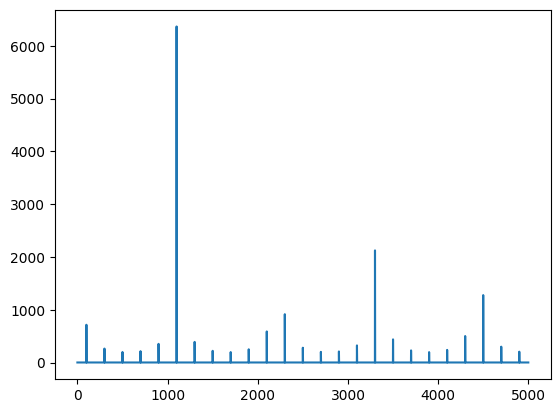

In [ ]:
from thinkdsp import SquareSignal

square = SquareSignal(1100).make_wave(duration=1, framerate=10000)
square.make_spectrum().plot()
square.make_audio()

Для того, чтобы было удобнее анализировать полученный спектр, выведем несколько пиков:

In [ ]:
square.make_spectrum().peaks()[:10]

[(6367.182534102138, 1100.0),
 (2125.0234754609446, 3300.0),
 (1278.179301804898, 4500.0),
 (916.3945635352013, 2300.0),
 (716.3133230172564, 100.0),
 (589.7524848583665, 2100.0),
 (502.79979422568437, 4300.0),
 (439.63348354369833, 3500.0),
 (391.8810380915291, 1300.0),
 (354.6987875059537, 900.0)]

Рассматриваемый сигнал является прямоугольным, следовательно, он будет иметь только нечётные гармоники. Таким образом, ожидаемыми гармониками сигнала должны быть 3200, 5500, 7700 и 9900 Гц.

Как и ожидалось, на спектре, полученном выше, есть пики 1100 и 3300 Гц. Однако, следующие пики равны 4500, 2300 и 100 Гц вместо ожидаемых 5500, 7700 и 9900 Гц соответственно. Данный эффект связан с биениями, которые возникли в выборках с частотой 10 000 Гц кадров в секунду из сигналов выше 5000 Гц.
В качестве примера ниже приведём пример графика, где изображены оба сигнала (4500 и 5500 Гц) серыми линиями, а выборки - вертикальными.

* Сигнал 4500 Гц при 10 000 кадрах/с

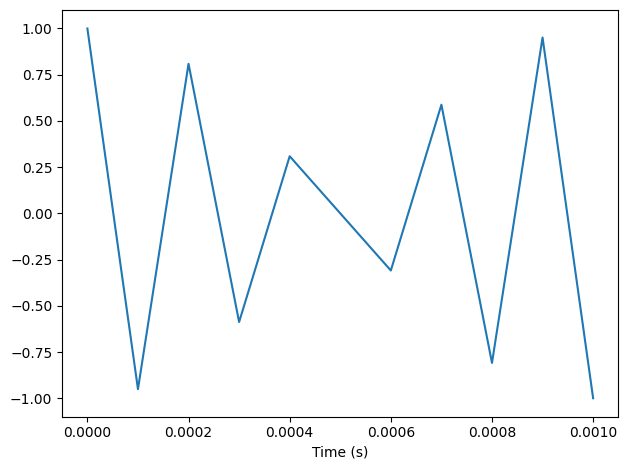

In [ ]:
from thinkdsp import CosSignal

signal = CosSignal(4500)
duration = signal.period*5
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

* Сигнал 5500 Гц при 10 000 кадрах/с

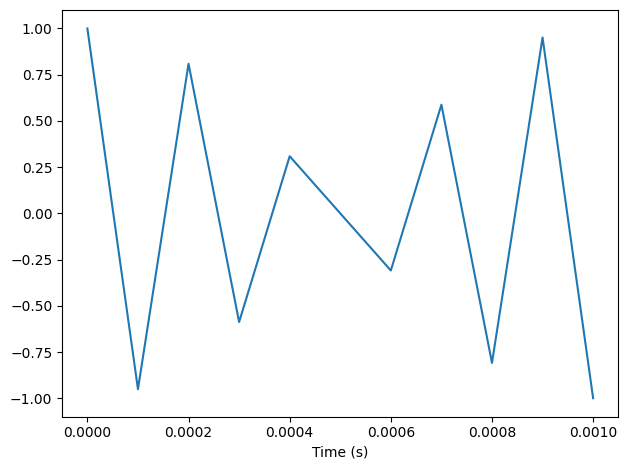

In [ ]:
signal = CosSignal(5500)
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Как видно, значения ***signal*** различаются, а ***wave*** совпадают. Отсюда становится понятно, что выборки с частотой 10 кГц/с из сигнала 5500 Гц не будут отличимы от выборок из сигнала 4500 Гц, 77000 не будет отличима от 2300 Гц и тд.

* Как итог, сигнал заучит совсем по-другомму. Например, появятся частоты, не кратные основным (2300 Гц). Если же рассмотреть 100 Гц, то появятся лишние низкие частоты, из-за чего звук станет более низким.

In [ ]:
from thinkdsp import SinSignal

SinSignal(2300).make_wave(duration=1, framerate=10000).make_audio()

In [ ]:
SinSignal(100).make_wave(duration=1, framerate=10000).make_audio()

* Получившиеся аудиозаписи сильно отличаются от первоначальной, что показывает как силдьно могут биения повлиять на исходный сигнал.

## lab 2.4
___

**Задание**: Взять объект **Spectrum** и распечатать несколько первых значений **Spectrum.fs**. Убедиться в том, что начинаются с нуля, т.е. **Spectrum.hs[0]** - амплитуда комоненты с чатотой 0. Провести эксперемент:

1) Создать треугольный сигнал с частотой 440 Гц и **wave** длительностью 0,01 с. Распечатать сигнал

2) Создать объект **Spectrum** и распечатать **Spectrum.hs[0]**. Понять каковы амплитуда и фаза этого компонента.

3) Установить **Spectrum.hs[0] = 100**. Ронять как эта операция повлияет на сигнал.

Создадим треугольный сигнал:

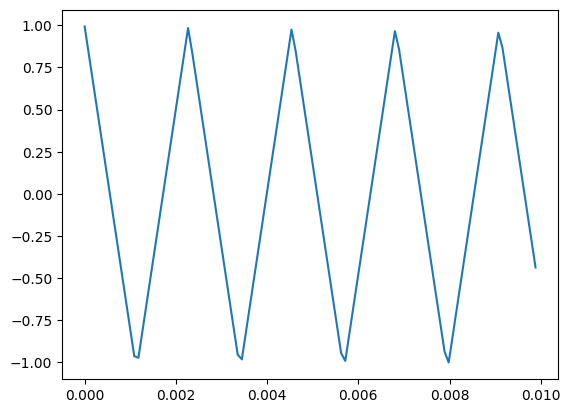

In [ ]:
from thinkdsp import TriangleSignal

triangle = TriangleSignal(freq=440).make_wave(duration=0.01)
triangle.plot()

Получим спектр и выведем первый элемент **Spectrum.hs[0]**, чтобы убедиться в том, что он равен 0:

In [ ]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

Установим это занчение равное 100 и выведем новый (красный график) и исходный (синий график) сигналы:

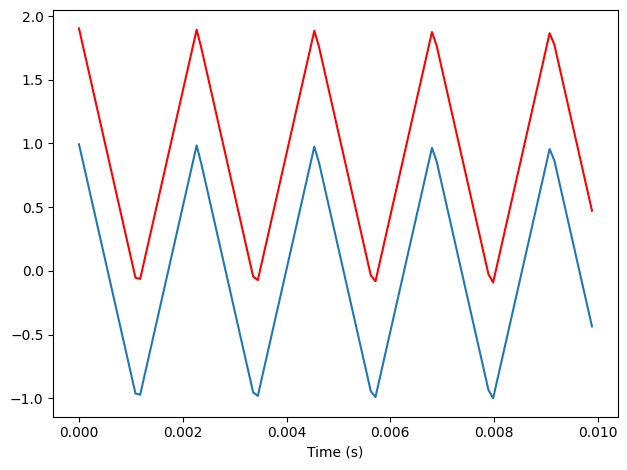

In [ ]:
spectrum.hs[0] = 100

triangle.plot()
spectrum.make_wave().plot(color='red')
decorate(xlabel='Time (s)')

* Компонент нулевой частоты **Spectrum.hs[0]** представляет собой сумму всех значений сигнала. Поскольку изначально сигнал был несмещён, этот компонент был равен 0. После изменений этого значения на 100 произошло смещение, вследствие чего график поднялся вертикально вверх, не сдвигаясь по горизонтали.

## lab 2.5
___

**Задание**: Написать функцию, принимающую **Spectrum** как параметр и изменяющую его делением каждого элемента **hs** на соответствующую частоту из **fs**.

In [ ]:
def change_spectrum(spectrum):
    spectrum.hs[0] = 0 # исключаем деление на 0
    spectrum.hs[1:] /= spectrum.fs[1:] # делим спектр на fs

Проверим эту функцию, используя прямоугольный сигнал, треугольный или пилообразный сигналы:

1) Вычислим **Spectrum** и распечатаем его

In [ ]:
wave = TriangleSignal().make_wave(duration=1)
wave.make_audio()

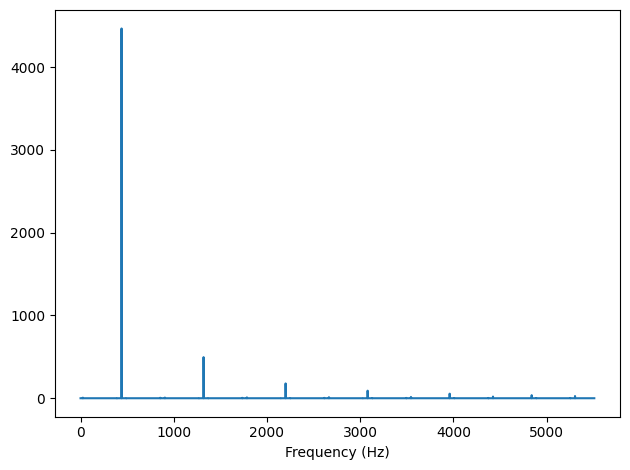

In [ ]:
spectrum = wave.make_spectrum()
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

2) Изменим **spectrum** с помощью функции **change_spectrum**:

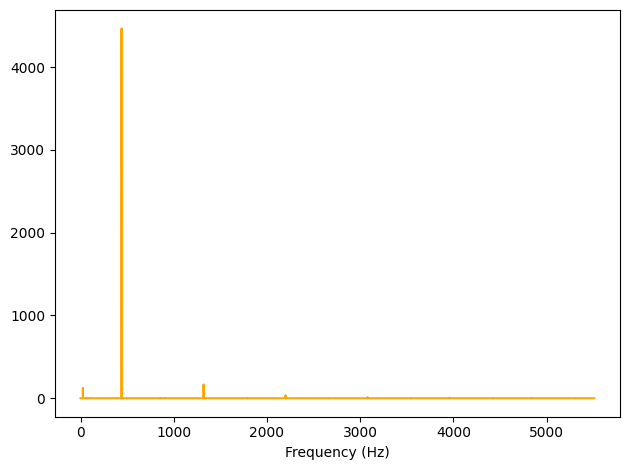

In [ ]:
change_spectrum(spectrum)
spectrum.scale(440)
spectrum.plot(high=10000, color='orange')
decorate(xlabel='Frequency (Hz)')

Посмотрев на график и сравнив его с изначальным, видно, что механизм чем-то напоминает фильтр низких частот.

3) Воспользуемся **Spectrum.make_wave**, чтобы сделать **wave** из изменённого **Spectrum** и воспроизведём его:

In [ ]:
changed = spectrum.make_wave()
changed.make_audio()

После прослушивания получившегося аудиофайла слышно, что звук стал более низким (высоких частот меньше), что подтверждает ожидаемый результат.

## lab 2.6
___

**Задание**: У треугольных и прямоугольых сигналов есть только нечётные гармоники; в пилообразном сигнале есть и чётные, и нечётные гармоники. Гармоники прямоугольных и пилообразных сигналов уменьшаются пропорционально $1/f$, гармоники треугольных сигналов - пропорционально $1/f^2$. Нужно понять, можно ли найти сигнал, состоящий из чётных и нечётных гармоник, спадающих пропорционально $1/f^2$.

Напишем вспомогательную функцию, которая будет определять, подчиняются ли поступающие на её вход значения формуле $1/f^2$. Это поможет проверить, получилось ли найти необходимый сигнал.

In [ ]:
def check_f_squared_law(freqs, amps):
  """
  Проверяет, подчиняются ли амплитуды сигнала закону квадрата частоты.

  Args:
    freqs: Список частот сигнала.
    amps: Список амплитуд сигнала.

  Returns:
    True, если амплитуды подчиняются закону квадрата частоты, False - в противном случае.
  """

  # Вычислить ожидаемые амплитуды
  expected_amps = 1 / freqs**2

  # Сравнить ожидаемые и фактические амплитуды
  tolerance = 1e-6
  return np.allclose(amps, expected_amps, atol=tolerance)

Попытаемся получить сигнал путём сложения нескольких синусооид.

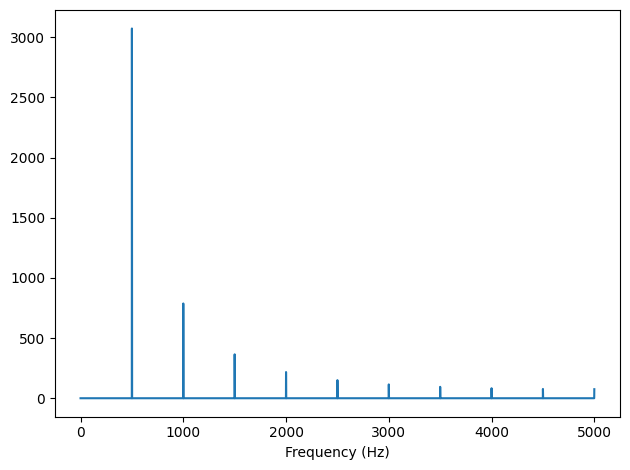

In [ ]:
from thinkdsp import SinSignal

freqs = np.arange(500, 9500, 500) # список частот
amps = 1 / freqs**2 # dопределяет амплитуды для каждой из частот
signal = sum(SinSignal(freq, amp) for freq, amp in zip(freqs, amps)) # создаём сигнал, суммируя косинусоиды

spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

Выведем пики спектрограммы, чтобы увидеть последовательность убывания частот:

In [ ]:
spectrum.peaks()[:10]

[(3072.4404653429615, 500.0),
 (787.3786432330505, 1000.0),
 (364.7999997232463, 1500.0),
 (217.6261045864612, 2000.0),
 (150.37593984962825, 2500.0),
 (114.87699586469492, 3000.0),
 (94.70798373552688, 3500.0),
 (83.1257751127871, 4000.0),
 (77.07410758923834, 4500.0),
 (75.18796992480947, 5000.0)]

С помощью созданной ранее вспомогательной функции **check_f_squared_law()** проверим, что полученный сигнал соответствует тому, который требовалось найти по заданию:

In [ ]:
result = check_f_squared_law(freqs, amps)
print(result) # True

True


Воспроизведём полученный сигнал:

In [ ]:
wave = signal.make_wave(duration=1, framerate=10000)
wave.make_audio()

Как видно, вывелось значение ***True***, что говорит о том, что гармоники спадают пропорционально $1/f^2$, что соответствует требованиям задания.

# lab 3 - Апериодические сигналы
___

In [ ]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2024-02-11 14:33:58--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2024-02-11 14:33:58--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48574 (47K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.44K  --.-KB/s    in 0.01s   

2024-02-11 14:33:59 (3.45 MB/s) - ‘thinkdsp.py’ saved [48574/48574]



In [63]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate, read_wave

## lab 3.1
___

**Задание**: Запустить и прослушать примеры из блокнота **[chap03.ipymp](https://colab.research.google.com/github/AllenDowney/ThinkDSP/blob/master/code/chap03.ipynb)**. В примере с утечкой заменить окно Хэмминга одним из окон, предоставленных в **NumPy** и посмотреть , как они вллияют на утечку (см. [ссылку](http://docs.scipy.org/doc/numpy/reference/routines.window.html)).

Посмотрим на влияние утечки на синусоидальный сигнал (который содержит только одну частотную составляющую).

In [ ]:
from thinkdsp import SinSignal

signal = SinSignal(freq=440)

Создадим синусоидальный сигнал с частотой 440 Гц.

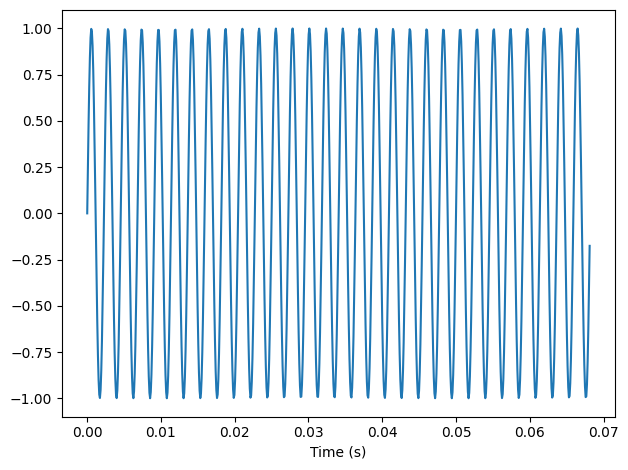

In [ ]:
duration = signal.period * 30
wave = signal.make_wave(duration)
wave.plot()
decorate(xlabel='Time (s)')

Разложимего в  спектр с параметром **high**=880, т.е. так, чтобы утечка была кратна периоду:

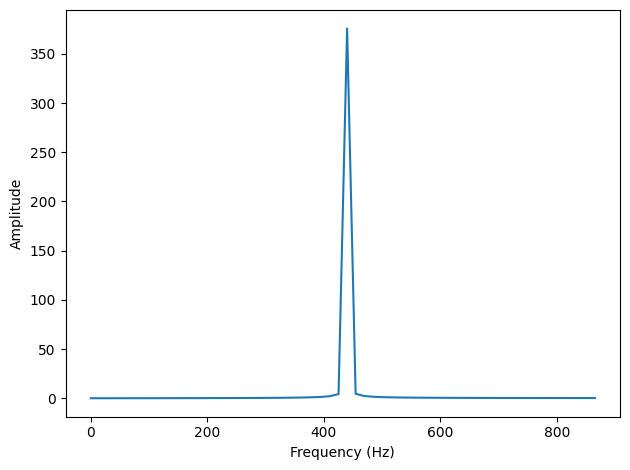

In [ ]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Теперь рассмотрим случай, когда утечка не кратна периоду. В этом случае утечка будет очень серьёзной.

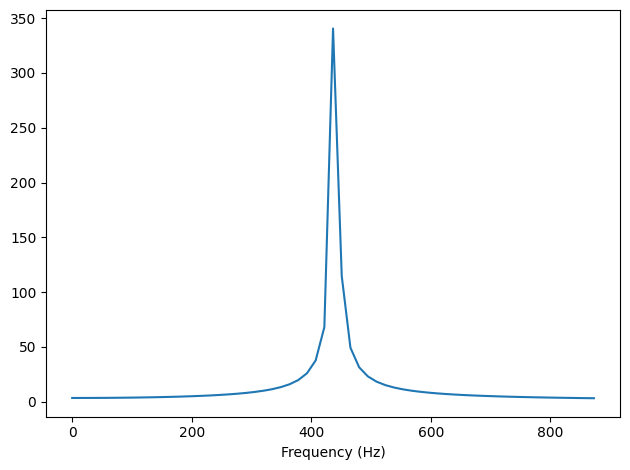

In [ ]:
duration = signal.period * 30.25
wave = signal.make_wave(duration)
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

В таком случае можно использовать окна. Их использование поможет, однако, это уменьшит общую энергию.

Рассмотрим как будет выглядеть эффект 5ти разных окон:

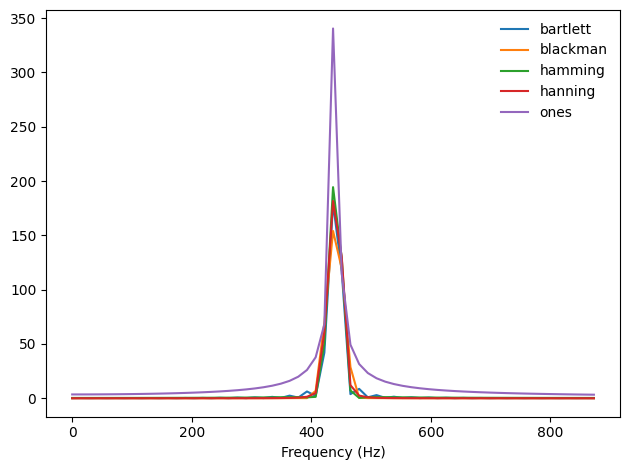

In [ ]:
for window_func in [np.bartlett, np.blackman, np.hamming, np.hanning, np.ones]:
    wave = signal.make_wave(duration)
    wave.ys *= window_func(len(wave.ys))

    spectrum = wave.make_spectrum()
    spectrum.plot(high=880, label=window_func.__name__)

decorate(xlabel='Frequency (Hz)')

Заметим, что функция Бартлетта оставляет остаточный дребезг. Во всех случаях ф-ция Хэмминга показывает себя лучше всего, т.к. она рассеивает меньше всего энергии, поэтому была использована именно она.

## lab 3.2
___

**Задание**: Написать класс, называемый `SawtoothChirp`, расширяющий `Chirp` и переопределяющий `evaluate` для генерации пилообразного  сигнала с линейно увеличивающейся (или уменьшающейся) частотой.

Нарисовать эскиз спектрограммы этого сигнала и распечатать её. Эффект биений должен быть очевиден, а если сигнал внимательно прослушать, то можно услышать биения.

В качестве заготовки функции воспользуемся функцией из пункта 2.2

In [51]:
from thinkdsp import Chirp
from thinkdsp import normalize, unbias

PI2 = np.pi * 2

class SawtoothChirp(Chirp):
    """Представляет пилообразный сигнал с переменной частотой."""

    def evaluate(self, ts):
        freqs = np.linspace(self.start, self.end, len(ts))
        dts = np.diff(ts, prepend=0) # разница м/у соседними эл-тами ts (эл-ты времени)
        dphis = PI2 * freqs * dts # изменения фазы
        phases = np.cumsum(dphis) # вычисляет нарастающую сумм2у
        phases = np.insert(phases, 0, 0) # добавляем 0 в начало
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys =  normalize(unbias(frac), self.amp)
        return ys

Создадим сигнал, воспользовавшись `SawtoothChirp` и воспроизведём его:

In [52]:
signal = SawtoothChirp(start=220, end=880)
wave = signal.make_wave(duration=1, framerate=4000)
wave.apodize()
wave.make_audio()

График сигнала будет выгляеть следующим образом:

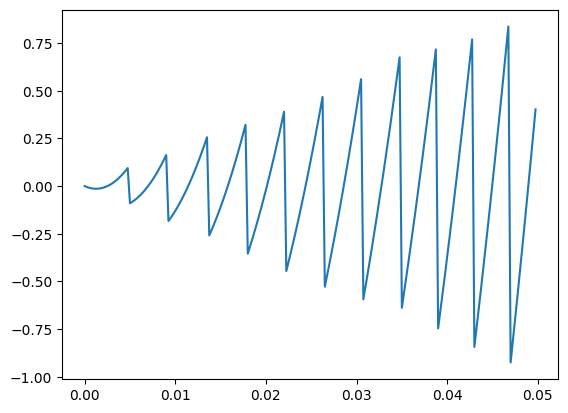

In [53]:
wave.segment(duration=0.05).plot()

График и аудио запись подтверждают то, что сигнал пилообразный. Теперь выведем спектрограмму полученного сигнала:

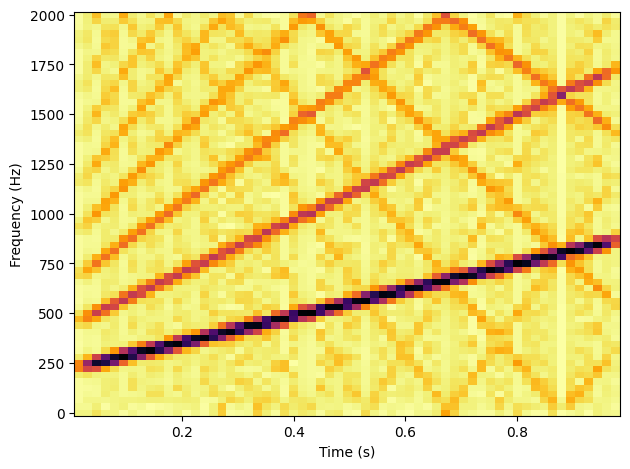

In [56]:
spectrum = wave.make_spectrogram(128)
spectrum.plot()
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

При малой частоте кадров можно наблюдать как совмещённые гармоники отображаются от частооты сгиба. На практике их можно уловить как шипение пр и прослушивании аудио файла. Если увеличить частоту кадров, то они исчезнут:

## lab 3.3
___

**Задание**: Создать пилообразный `Chirp`, меняющийся от 2500 до 3000 Гц, и на его основе сгенерировать сигнал длительностью 1 с и частотой кадров 20 кГц. Нарисовать, каким примерно будет Spectrum. Затем распечатать Spectrum и посмотреть, правильно ли было сделано предполажение.

Создадим чирп:

In [57]:
signal = SawtoothChirp(start=2500, end=3000)
wave = signal.make_wave(duration=1, framerate=20000)
wave.make_audio()

Основная частота колеблется от 2500 до 3000 Гц, следовательно, при 2500 Гц сигнал резко возрастёт, после чего будет идти до 3000 Гц, а затем упадёт (этот фрагмент находится выше последующих, т.к. мы имеем дело с пилообразным сигналом, гармоники которого убывают пропорционально $1/f$, следовательно каждый последующий скачок будет меньше предыдущего). Таком образом, дойдя до 2го промежутка, который начинается при 5000 Гц, сигнал возрастёт, однако пик будет в 2 раза меньше сегмента 1. После 6000 Гц чигнал упадёт. Аналогично будет и с 3им сегментом (с 7500 по 9000 Гц), где сигнал возрастёт на высоту $= 1/3$ от первоначальной, а зетем снова упадёт. Примерный вид спектрограммы представлен на рисунке ниже:

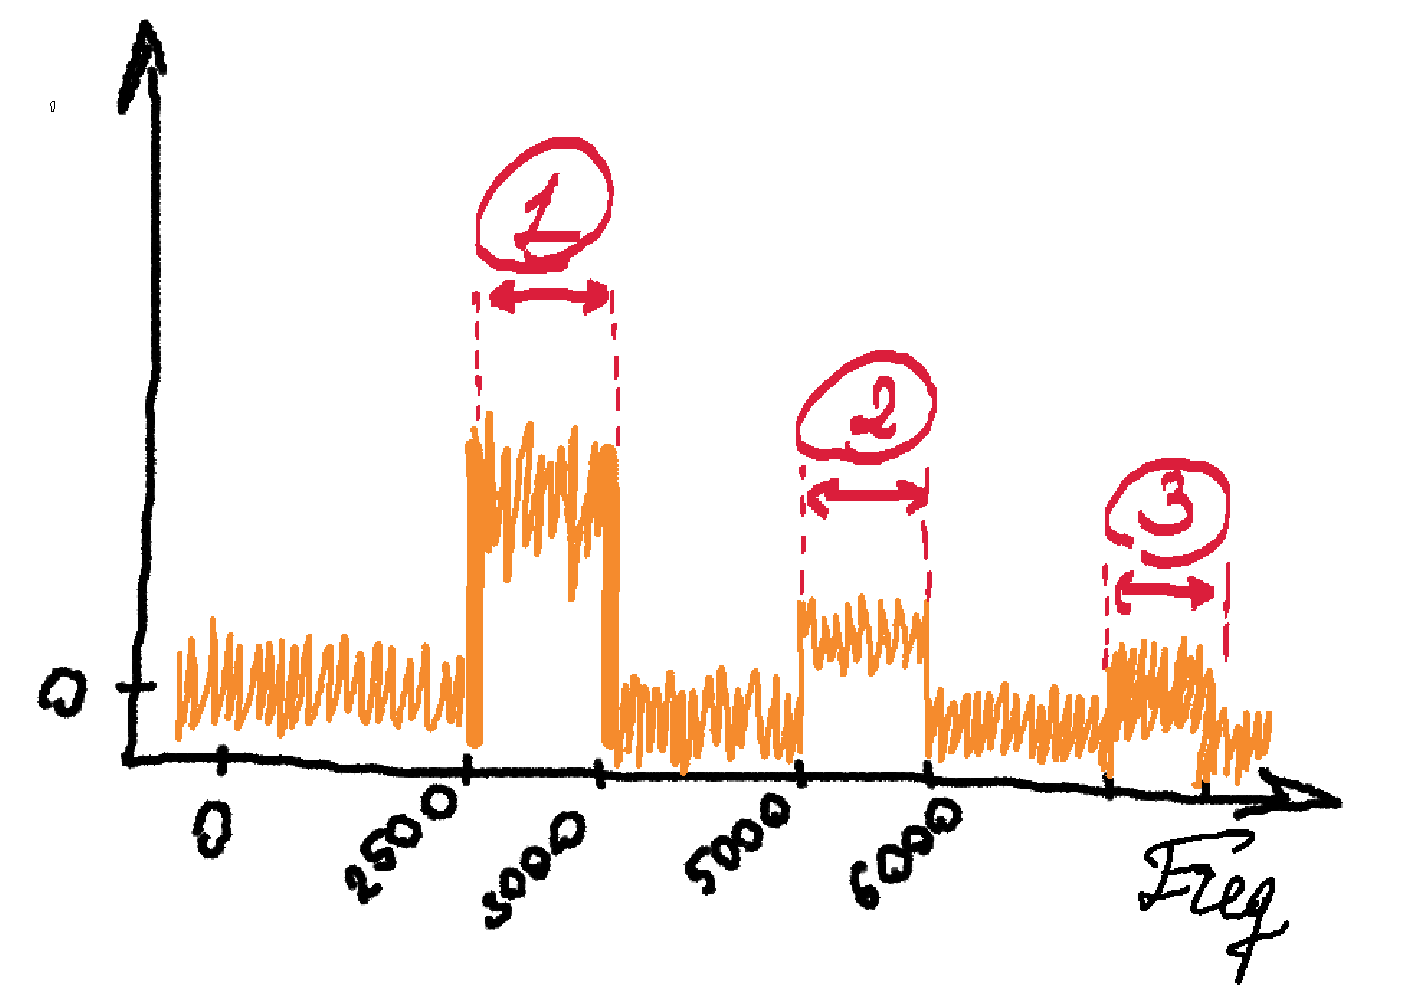

Теперь построим требуемую спектрограмму и распечатаем её:

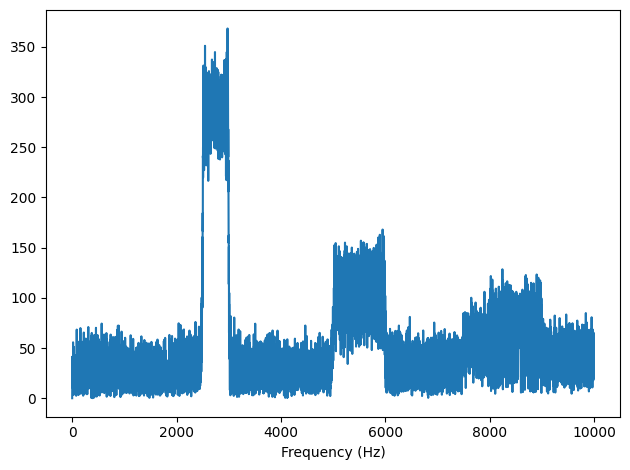

In [58]:
wave.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

Получившаяся спектрограмма совпала с вышеизложенными ожиданиями

## lab 3.4
___

**Задание**: В музыкальной терминологии *глиссандо* - это нота, меняющаяся от одной высоты до другой, то есть, свободный чирп.
Найти или записать звук глиссандо и распечатать спектрограмму первых нескольких секунд.

In [71]:
if not os.path.exists('test.wav'):
    !wget https://github.com/MatNepo/Telekom2024/blob/main/lab3/test.wav

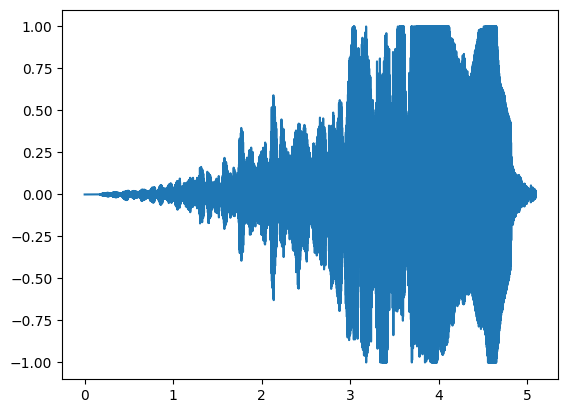

In [116]:
wave = read_wave('test.wav')
wave.segment().plot()
wave.make_audio()

Выведем спектрограмму:

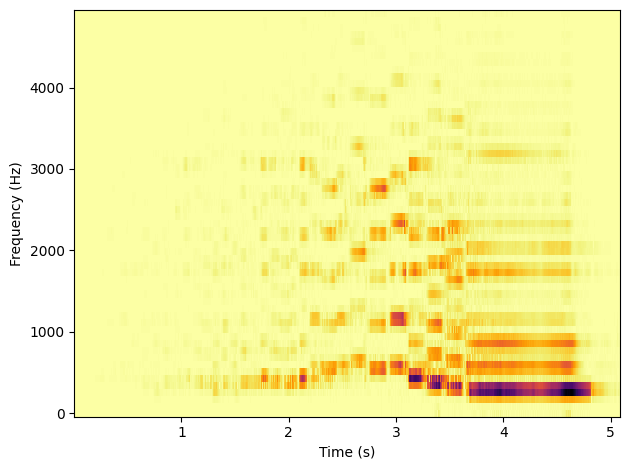

In [117]:
wave.make_spectrogram(512).plot(high=5000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

На полученной спектограмме можно заметить зависимость частоты от высоты сигнала (ноты): по мере того, как звук становился громче и ноты менялись, менялась и частоты. Как только последняя нота была сыграна, частота пеестала расти.

## lab 3.5
___

**Задача**: Трумбонист играет глиссандо, непрерывно дуя в мундштук и двигая кулису трамбона. При этом общая длина трубы меняется, а играемая нота обратно пропорциональна этой длине.

Если предположить, что музыкант двигает кулису с постоянной скоростью, как будет меняться во времени частота?

Напишите класс, называемый `TromboneGliss`, расширяющий `Chirp` и предоставляющий `еvaluate`. Создайте сигнал, имитирующий глиссандо на тромбоне от **С3** до **F3**, и обратно до **С3**. **С3** - 262 Гц; F3-349 Гц.

Напечатайте спектрограмму полученного сигнала. На что похоже глиссандо на тромбоне на линейный или же экспоненциальный чирп?

Создадим класс `TromboneGliss`:

In [125]:
class TromboneGliss(Chirp):
    """Представляет собой сигнал, похожий на тромбон, с различной частотой."""

    def evaluate(self, ts):
        """Оценивает сигнал в заданное время.

         ts: массив чисел с плавающей запятой

         Возвращает: волновой массив с плавающей запятой
        """
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts)) # длина кулисы трамбона
        freqs = 1 / lengths # изменение длины кулисы трамбона

        # стандартное объявление ф-ции evaluate
        dts = np.diff(ts, prepend=0)
        dphis = PI2 * freqs * dts # Фаза сигнала
        phases = np.cumsum(dphis)
        ys = self.amp * np.cos(phases)
        return ys

Согласно заданию, сигнал трамбона должен состоять из 2 частей:

* Опишем первую часть волны (от C3 до F3) и выведем аудио файл сигнала:

In [126]:
low = 262 # C3
high = 349 # F3

signal = TromboneGliss(high, low)
wave1 = signal.make_wave(duration=1)
wave1.apodize()
wave1.make_audio()

* Аналогично опишем вторую часть (от F3 до C3):

In [127]:
signal = TromboneGliss(low, high)
wave2 = signal.make_wave(duration=1)
wave2.apodize()
wave2.make_audio()

Соединим полученные части в один общий сигнал:

In [128]:
wave = wave1 | wave2
wave.make_audio()

Распечатаем спектрограмму полученного сигнала:

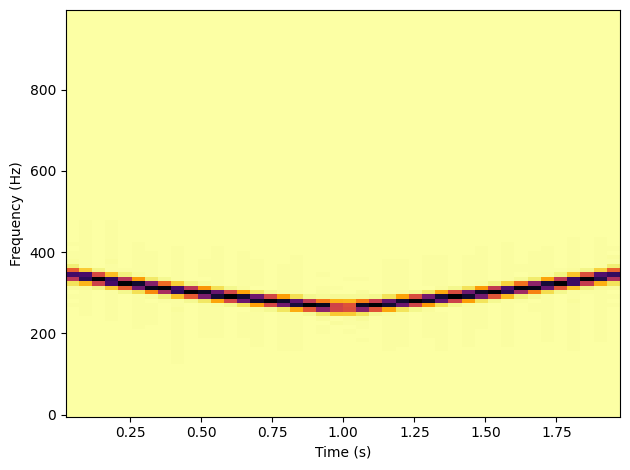

In [129]:
sp = wave.make_spectrogram(1024)
sp.plot(high=1000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

## lab 3.6
___

**Задание**: Сделать или найти запись серии гласных звуков и посмотреть на спектрограмму. Получится ли различить гласные?

Загрузим аудио файл с произношением глассных букв алфавита:

In [155]:
if not os.path.exists('87778__marcgascon7__vocals.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/87778__marcgascon7__vocals.wav

--2024-02-11 21:49:11--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/87778__marcgascon7__vocals.wav
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/87778__marcgascon7__vocals.wav [following]
--2024-02-11 21:49:11--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/87778__marcgascon7__vocals.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1399852 (1.3M) [audio/wav]
Saving to: ‘87778__marcgascon7__vocals.wav’

87778__marcgascon7_ 100%[===================>]   1.33M  --.-KB/s    in 0.07s   

2024-02-11 21:49:12 (19.5 MB/s) - ‘87778__

In [190]:
wave = read_wave('vowelsLetters.wav')
wave.make_audio()

Выведем спектрограмму сигнала. Плюсом данной аудио записи является тот факт, что здесь нету большого количества посторонних шумов, что позволит отчётливо распознать положение гласных звуков на спектрограмме

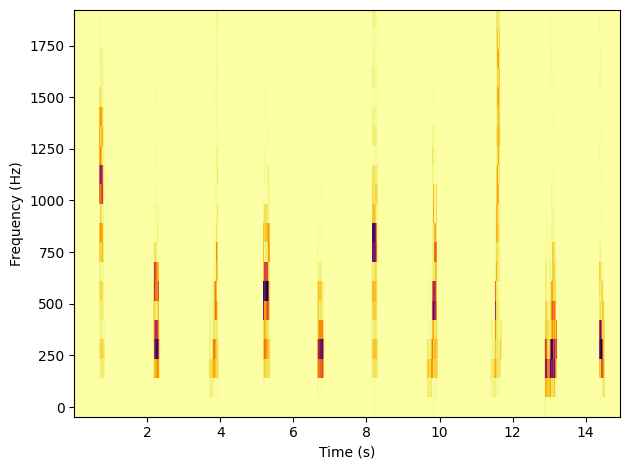

In [205]:
wave.make_spectrogram(512).plot(2000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

Форманты (пики на спектрограмме), которые выбиваются относительно фоновых шумов являются гласными звуками.

Гласные звуки русского языка а, э, и, о, у отличаются друг от друга по соотношению амплитуд первых двух формант (F1 и F2) относительно основного тона (F0). Это различие обуславливается артикуляционными характеристиками каждого звука, которые влияют на его спектральный состав.

* F0 (основной тон): 80-300 Гц (мужчины), 160-500 Гц (женщины).
* F1 (первая форманта): 200-800 Гц.
* F2 (вторая форманта): 800-2500 Гц.

Примерные диапазоны частот для изолированных гласных звуков (в контексте речи частоты могут меняться):

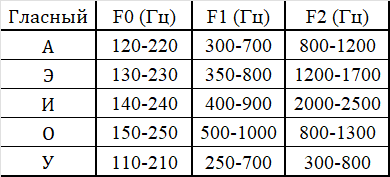

Выделим отдельно сегмент со звуком «а»:

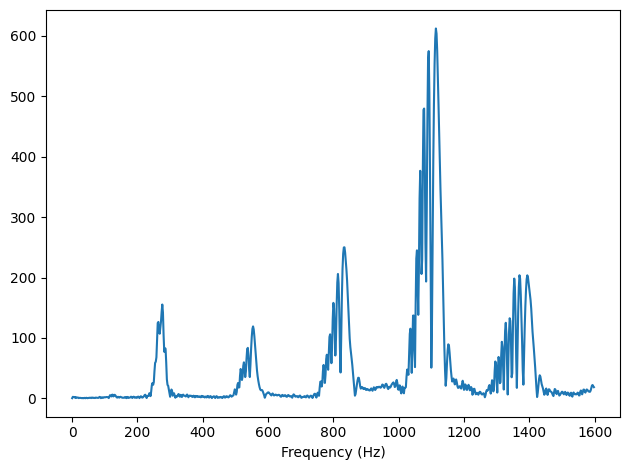

In [223]:
segment = wave.segment(start=0.5, duration=0.5)
segment.make_spectrum().plot(high=1600)
decorate(xlabel='Frequency (Hz)')
segment.make_audio()

Форманты находятся на частотах 250 Гц и 1100 Гц. Данные значение подходят под теоретическое описание звука «а».

Выделим отдельно сегмент со звуком «у»:

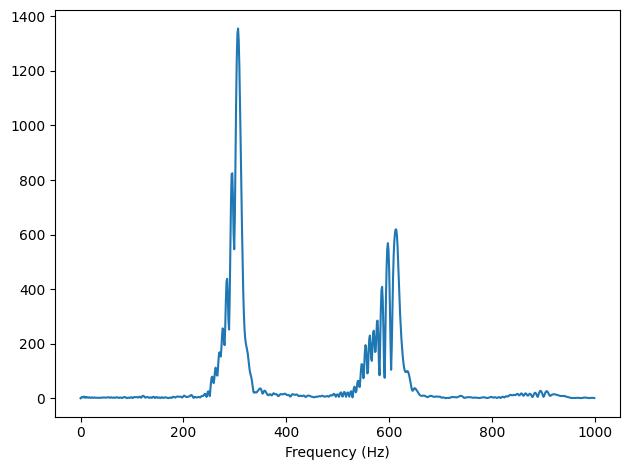

In [222]:
segment = wave.segment(start=2, duration=0.8)
segment.make_spectrum().plot(high=1000)
decorate(xlabel='Frequency (Hz)')
segment.make_audio()

Форманты находятся на частотах 300 Гц и 600 Гц (меньше 800, но не сильно). Несмотрея на то,что вторая форманта чуть сдвинута влево, по спектрограмме видно, что она описывает звук звука «у».

Выделим отдельно сегмент со звуком «о»:

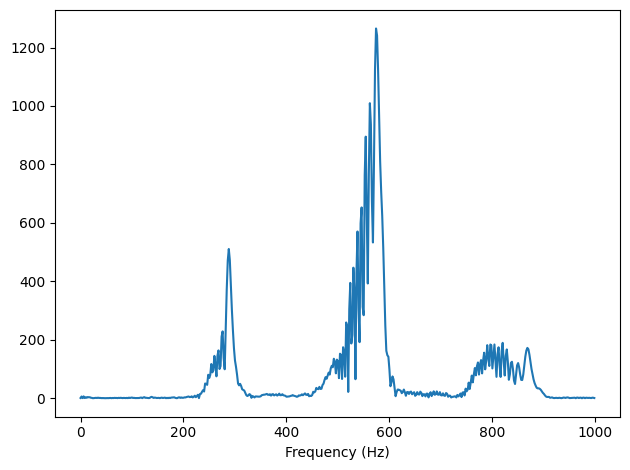

In [229]:
segment = wave.segment(start=5.1, duration=0.5)
segment.make_spectrum().plot(high=1000)
decorate(xlabel='Frequency (Hz)')
segment.make_audio()

Форманты находятся на частотах 580 Гц и 800 Гц. Данные значение подходят под теоретическое описание звука «о».

Выделим отдельно сегмент со звуком «э»:

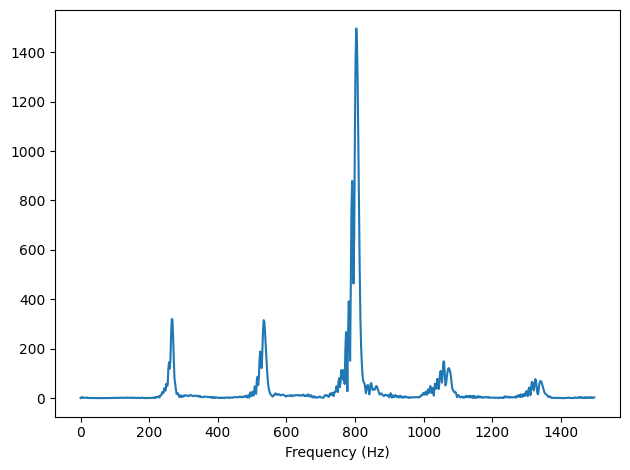

In [227]:
segment = wave.segment(start=8, duration=0.5)
segment.make_spectrum().plot(high=1500)
decorate(xlabel='Frequency (Hz)')
segment.make_audio()

Ожидаемыми формантами являются 800 Гц для F1 и 1200-17000 Гц для F2. Значения F1, полученные спектограммой совпали с ожидаемыми. Значение F2 на спектограмме не совсем соответствует нужному, однако можно заметить, что на частотах от 1000 до 1400 Гц есть форманты, что говорит о том, что по спектограмме можно понять, что на ней изображён звук «э».

Выделим отдельно сегмент со звуком «и»:

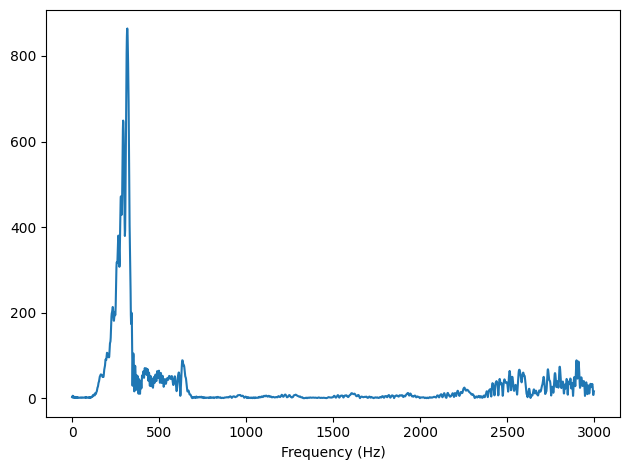

In [217]:
segment = wave.segment(start=14.1, duration=0.7)
segment.make_spectrum().plot(high=3000)
decorate(xlabel='Frequency (Hz)')
segment.make_audio()

Форманты находятся на частотах 300 Гц и 2500 Гц. Данные значение примерно подходят под теоретическое описание звука «о».

Таким образом, если звукии не являются частью фраз и звучат отчётливо, то их спектрограммы соответствуют теоретическим значениям. В случае же наличия контекста, либо посторонних шумов, эти значения будут отличаться от ожидаемых, однако, по прежнему, во многих случаях, будет различимо какой звук описывается.

Возможно, именно этот метод (анализ соответствия формант определённым звукам и привязка к определённым промежуткам частот каждого звука) стоит в основе современных сервисов, работающих с поступающими голосовыми запросами (например, Google Assistant, Yandex Алиса, Shazam и так далее)